## 情人节词云示例

### 1.引入相关的库包：

In [1]:
#coding:utf-8
__author__ = 'Hanxiaoyang'
import re
import time
import jieba        #分词包
import numpy as np  #numpy计算包
import codecs        #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas as pd
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud #词云包

### 表情统计

In [14]:
dateparse = lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(x)/1000))
content = pd.read_csv('message-18-02-08.csv', encoding='gb18030', 
                          parse_dates=['createTime'], date_parser=dateparse)
cols = ["msgId","msgSvrId","type","status","isSend","isShowTimer","createTime","talker","content","imgPath","reserved","lvbuffer","transContent","transBrandWording","talkerId","bizClientMsgId","bizChatId","bizChatUserId","msgSeq","flag"]
print content[(content.talker=='love-a-jun')&(content.type==1)][cols].head(200)

SyntaxError: invalid syntax (<ipython-input-14-4fd71bfa0d9f>, line 2)

In [4]:
reg = r'(\[[^\[]+\])|(\/\:[\:BX8]\-?[\)\~\(\$\|D\>\*\']+)|(\/\:\w*)|(|||)'
pattern = re.compile(reg)
text_ = '[www]右上角[捂脸]是你吗/:8*哈哈/::-)呵呵/:hug哈哈/:B-)哈哈/:Strong/:showlove/:'
pureText = []
emojis = []
emotions = pattern.findall(text_) # re.match(reg, content.loc[24,'text'])
temp = []
for emoji in emotions:
    temp.append(''.join(emoji))
emojis.append('_'.join(temp)) # 添加纯表情
print(temp)
print(emojis)
s = re.split(reg, text_)
temp = []
for j in range(len(s)):
    if j%5 == 0:
        temp.append(s[j])
pureText.append(''.join(temp))
print(pureText)

['[www]', '[捂脸]', '\ue412', '/:8*', '/::-)', '/:hug哈哈', '/:B-)', '/:Strong', '/:showlove', '/:', '\ue40d']
['[www]_[捂脸]_\ue412_/:8*_/::-)_/:hug哈哈_/:B-)_/:Strong_/:showlove_/:_\ue40d']
['', '[www]', None, None, None, '右上角', '[捂脸]', None, None, None, '是', None, None, None, '\ue412', '你吗', None, '/:8*', None, None, '哈哈', None, '/::-)', None, None, '呵呵', None, None, '/:hug哈哈', None, '', None, '/:B-)', None, None, '哈哈', None, None, '/:Strong', None, '', None, None, '/:showlove', None, '', None, None, '/:', None, '', None, None, None, '\ue40d', '']
['', '右上角', '是', '你吗', '哈哈', '呵呵', '', '哈哈', '', '', '', '']
['右上角是你吗哈哈呵呵哈哈']


In [3]:
reg = r'(\[[^\[]+\])|(\/\:[\:BX8]\-?[\)\~\(\$\|D\>\*\']+)|(\/\:\w*)|(|||)'
pattern = re.compile(reg)
#text_ = '[www]右上角[捂脸]是你吗/:8*哈哈/::-)呵呵/:hug哈哈/:B-)哈哈/:Strong/:showlove/:'
pureText = []
emojis = []
for i in content[(content.type==1)].index:
    text_ = content.loc[i, 'content'].encode()
    emotions = pattern.findall(text_) # re.match(reg, content.loc[24,'text'])
    temp = []
    for emoji in emotions:
        temp.append(''.join(emoji))
    emojis.append('_'.join(temp)) # 添加纯表情
    
    s = re.split(reg, text_)
    temp = []
    for j in range(len(s)):
        if j%5 == 0:
            temp.append(s[j])
    pureText.append(''.join(temp)) # 添加去除表情的纯文本信息
cols = ["msgId","status","isSend","createTime","talker","talkerId","msgSeq","flag"]
df_text = content[content.type==1][cols]
df_text.loc[:,'content'] = pureText
df_text.loc[:,'emojis'] = emojis

In [7]:
segment=[]
text_str = df_text[(df_text.talker=='love-a-jun')].to_string(columns=['content'],header=False, index=False)
jieba.enable_parallel(3) # 并行

special_words = [u'亲爱的',u'美美的',u'美美哒',u'没时间',u'时间段']
for sw in special_words:
    jieba.add_word(sw)
segs=jieba.cut(text_str) # 切词，“么么哒”才能出现
for seg in segs:
    if seg!='\r\n' and (len(seg) > 1 or seg.find(u'美') >= 0):
        if seg.find(u'美') >= 0:
            segment.append(u'美')
        segment.append(seg)

### 3.去停用词（“多喝热水”和闹嘴的小细节可以在这里抹去）

In [8]:
words_df=pd.DataFrame({'segment':segment})
#words_df.head()
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'],encoding="utf-8")
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

### 4.统计词频（情侣对话日常高频词）

In [9]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(["计数"],ascending=False)
words_stat

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


,segment,计数
1962,亲爱的,1205
9201,明天,625
4703,哈哈哈,523
1513,东西,514
4411,吃饭,453
2048,今晚,417
7562,感觉,417
4909,回来,379
1384,不用,372
4886,回去,360


In [26]:
weight={}
f=open('cn_words.txt')
wordstr=f.read()
words=wordstr.split(' ')
keys=['嘉', '嘉嘉', '咔', '咔咔', '嘉咔', '咔嘉', '七夕', '快乐']
for word in words:
    weight[word]=random.randint(1,100)
    for i in range(8):
        weight[keys[i]+word]=random.randint(1,2000)
print(len(weight))
f.close()

31482


### 5.做词云（开启亮瞎眼么么哒模式）

In [32]:
data_frame = pd.read_csv("rtx.csv")
data_frame
names=[]
weight={'文勇':105, '卢茂祥':100, '吴瑨强':99, '卢开瑞':99, '何瑞龙':99, '李昊旻':95, '夏松华':95, '赖剑清':96, '孙志宇':97, '莫阳':96, '杜伟':95, '江丹阳':95, '朱国力':95, '蒋琴':95, '李立烤':95, '李欣欣':95, '吴晓洁':95, '王文博星':95, '周广昌':95, '张宇翔':95, '武涵':96, '朱文鹏':95, '陈志强':95, '杨鹏翼':95, '张浩':95 ,'陈航':93, '吕相龙':92, '杨宁':92, '王杰':92, '杨思继':92}
print(len(weight))
for name in weight.keys():
    for count in range(weight[name]):
        names.append(name)

words_df=pd.DataFrame({'names':names})
words_stat=words_df.groupby(by=['names'])['names'].agg({"计数":np.size})
words_stat=words_stat.reset_index().sort_values(["计数"],ascending=False)
words_stat

30


D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()


,names,计数
11,文勇,105
2,卢茂祥,100
0,何瑞龙,99
5,吴瑨强,99
1,卢开瑞,99
8,孙志宇,97
27,赖剑清,96
25,莫阳,96
21,武涵,96
16,李立烤,95


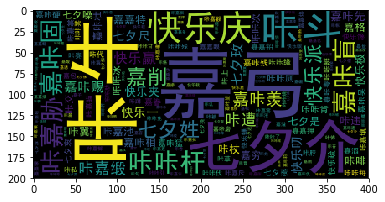

In [27]:
%matplotlib inline
wordcloud=WordCloud(font_path="simhei.ttf",background_color="black")
wordcloud=wordcloud.fit_words(weight)
plt.imshow(wordcloud)
plt.show()

In [4]:
%matplotlib inline
wordcloud=WordCloud(font_path="simhei.ttf",background_color="black")
wordcloud=wordcloud.fit_words(words_stat.head(1000).itertuples(index=False))
plt.imshow(wordcloud)
plt.show()

NameError: name 'words_stat' is not defined

### 6.自定义背景图做词云（让他看到你的心）

In [28]:
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


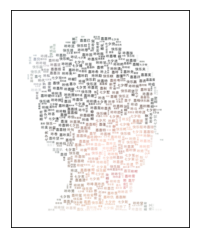

In [41]:
bimg=imread('yjy1.jpg')
wordcloud=WordCloud(background_color="white", max_words=8000, mask=bimg,
                    max_font_size=8, random_state=35, font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(weight)
bimgColors=ImageColorGenerator(bimg)
#plt.axis("off")

frame = plt.gca()
# y 轴不可见
frame.axes.get_yaxis().set_visible(False)
# x 轴不可见
frame.axes.get_xaxis().set_visible(False)

plt.imshow(wordcloud.recolor(color_func=bimgColors), interpolation="bilinear")
plt.show()
plt.savefig("test.png", bbox_inches='tight', transparent=True, 
            format='png', dpi=1800, pad_inches=0, facecolor='w', edgecolor='w') # 
plt.close()

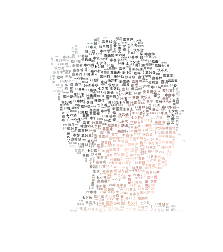

In [42]:
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
#plt.show()
plt.savefig("pro-3-wordcloud.png", dpi=1800)

In [45]:
%matplotlib
bimg=imread('heart.jpeg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(words_stat.head(39769).itertuples(index=False))
bimgColors=ImageColorGenerator(bimg)
#plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()

Using matplotlib backend: Qt5Agg


D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


FileNotFoundError: [Errno 2] No such file or directory: 'heart.jpeg'